## 뉴스 기사 분류 : 다중 분류 (p.117 ~ )

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/Users/nahyeonan/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/nahyeonan/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
len(train_data), len(test_data)

(8982, 2246)

In [3]:
train_data[0]   # 단어 인덱스

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [4]:
# 텍스트로 디코딩
word_index = reuters.get_word_index()
reverse_word_index = dict([ (value, key) for (key, value) in word_index.items() ])
decoded_newswire = ' '.join([ reverse_word_index.get(i-3, '?') for i in train_data[0]])

decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [5]:
train_labels[0]  # 토픽 인덱스

3

In [6]:
import numpy as np

# 데이터를 벡터로 변환
# 데이터의 크기 = (__, 10000)
def vectorize(sequences, dimension=10000):
    results = np.zeros(( len(sequences), dimension ))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1.
    return results

x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [7]:
# 레이블을 벡터로 변환 (원핫인코딩)
# 레이블의 크기 = (__ , 46)
def to_one_hot(labels, dimension=46):
    results = np.zeros(( len(labels), dimension ))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [8]:
# 원 핫 인코딩
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [9]:
# modeling
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [10]:
# compile
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
# validate
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [12]:
# train
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 48ms/step - loss: 3.1492 - accuracy: 0.4269 - val_loss: 1.7185 - val_accuracy: 0.6390
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.4973 - accuracy: 0.6953 - val_loss: 1.2976 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0621 - accuracy: 0.7707 - val_loss: 1.1167 - val_accuracy: 0.7540
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8260 - accuracy: 0.8261 - val_loss: 1.0289 - val_accuracy: 0.7670
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6661 - accuracy: 0.8626 - val_loss: 0.9678 - val_accuracy: 0.7870
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5147 - accuracy: 0.8960 - val_loss: 0.9225 - val_accuracy: 0.7990
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4090 - accuracy: 0.9162 - val_loss: 0.9154 - val_accuracy: 0.8160
Epoch 8/20
16

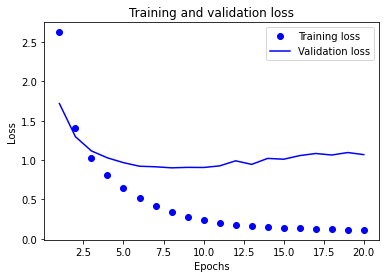

In [13]:
# loss graph
import matplotlib.pyplot as plt

loss = history.history['loss']  # training loss
val_loss = history.history['val_loss']  # validation loss

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

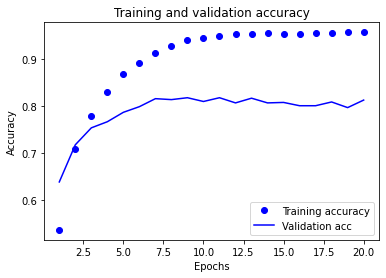

In [14]:
# accuracy graph
plt.clf()  # 그래프 초기화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [15]:
# train again
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 30ms/step - loss: 3.1608 - accuracy: 0.3797 - val_loss: 1.7472 - val_accuracy: 0.6290
Epoch 2/9
16/16 [==============================] - 0s 17ms/step - loss: 1.5127 - accuracy: 0.6842 - val_loss: 1.3256 - val_accuracy: 0.7030
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 1.0849 - accuracy: 0.7688 - val_loss: 1.1781 - val_accuracy: 0.7310
Epoch 4/9
16/16 [==============================] - 0s 15ms/step - loss: 0.8698 - accuracy: 0.8111 - val_loss: 1.0461 - val_accuracy: 0.7870
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.6724 - accuracy: 0.8575 - val_loss: 0.9768 - val_accuracy: 0.7970
Epoch 6/9
16/16 [==============================] - 0s 17ms/step - loss: 0.5291 - accuracy: 0.8860 - val_loss: 0.9420 - val_accuracy: 0.8040
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 0.4249 - accuracy: 0.9176 - val_loss: 0.8968 - val_accuracy: 0.8130
Epoch 8/9
16/16 [===

In [16]:
results   # loss, accuracy

[1.0024079084396362, 0.7809438705444336]

In [18]:
# predict
prediction = model.predict(x_test)

prediction[0], one_hot_test_labels[0]

(array([4.95872264e-05, 8.22638831e-05, 6.70437948e-05, 9.70195234e-01,
        1.43287955e-02, 7.11661705e-05, 9.89593264e-06, 7.73807260e-05,
        1.79250829e-03, 1.55405927e-04, 8.49910502e-05, 3.96380347e-04,
        1.22466206e-03, 1.69072271e-04, 1.70800104e-05, 3.02903900e-05,
        1.45333842e-03, 1.37885960e-04, 2.87479052e-04, 2.23001488e-03,
        3.56900715e-03, 1.20069215e-03, 1.17221716e-05, 1.86273814e-04,
        1.88211870e-05, 2.60806901e-05, 3.08057970e-05, 1.45491867e-05,
        3.18231847e-04, 2.88137817e-04, 3.18499660e-04, 3.06546513e-04,
        2.84910720e-06, 1.72875079e-05, 3.43897118e-04, 2.77198924e-05,
        3.02367524e-04, 1.20840123e-05, 1.17287464e-05, 2.33537994e-05,
        3.15271354e-05, 5.56064988e-05, 1.36937706e-06, 1.11229219e-05,
        2.89049876e-06, 6.29428223e-06], dtype=float32),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [19]:
# 확률이 가장 높은 클래스
print(np.argmax(prediction[0]), np.argmax(one_hot_test_labels[0]))

3 3


# LSTM 텍스트 생성 모델 (p. 358 ~ )

In [20]:
import keras
import numpy as np

path = keras.utils.get_file('nietzsche.txt',
                           origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
text = open(path).read().lower()

print("말뭉치 크기:", len(text))

606208/600901 [==============================] - 1s 2us/step
말뭉치 크기: 600893


In [21]:
# 글자 시퀀스 벡터화 

maxlen = 60  # 60 글자의 시퀀스 추출
step = 3  # 3글자씩 건너뛰면서 새로운 시퀀스 샘플링

sentences = []
next_chars = []

for i in range(0, len(text)-maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
    
print("시퀀스 개수:", len(sentences))

chars = sorted(list(set(text)))  # 고유 글자를 담는 리스트
print("고유 글자:", len(chars))
char_indices = dict( (char, chars.index(char)) for char in chars )  # chars 리스트의 글자와 글자의 인덱스를 매핑

print("벡터화...")
# 원 핫 인코딩
x = np.zeros( (len(sentences), maxlen, len(chars)), dtype=np.bool )
y = np.zeros( (len(sentences), len(chars)), dtype=np.bool )
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

시퀀스 개수: 200278
고유 글자: 57
벡터화...


In [22]:
# model
from keras import layers

model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

In [24]:
# compile
optimizer = keras.optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [25]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [27]:
import random
import sys

random.seed(42)
start_index = random.randint(0, len(text) - maxlen - 1)

# 훈련 횟수 : 60
for epoch in range(1, 60):
    print("epoch", epoch)
    model.fit(x, y, batch_size=128, epochs=1)
    
    seed_text = text[start_index: start_index + maxlen]
    print('seed text "' + seed_text + '"')
    
    # 샘플링 온도
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print("temprature:", temperature)
        generated_text = seed_text
        sys.stdout.write(generated_text)
        
        # 시드 텍스트에서 시작해서 400개의 글자 생성
        for i in range(400):
            sampled = np.zeros( (1, maxlen, len(chars)) )
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.
                
            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)  # 다음 글자
            next_char = chars[next_index]
            
            generated_text += next_char
            generated_text = generated_text[1:]
            
            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

epoch 1
1565/1565 [==============================] - 111s 71ms/step - loss: 1.6137
seed text "the slowly ascending ranks and classes, in which,
through fo"
temprature: 0.2
the slowly ascending ranks and classes, in which,
through for the spirit and the spirit and the more the spirit and something to the act and the spirit and the constitive of the spirit and the moral and and the spirit and the spirit and the spirit and the consider the spirit and the same to the stranged in the longer the free of the poses to the spirit and the state of the spirit and the spirit and the spirit and the free spirit and with the spirit and the
temprature: 0.5
the slowly ascending ranks and classes, in which,
through for for and in the even and the experistic all the must to the more believed the to the religion of the things in the transerficism for the suppess of the existence to the spirit be will being in this possible of the relardence of the done of men, the distinguating and every attem in the stri

KeyboardInterrupt: 